_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
__________

Text(0.5,1,'Accuracy Curves')

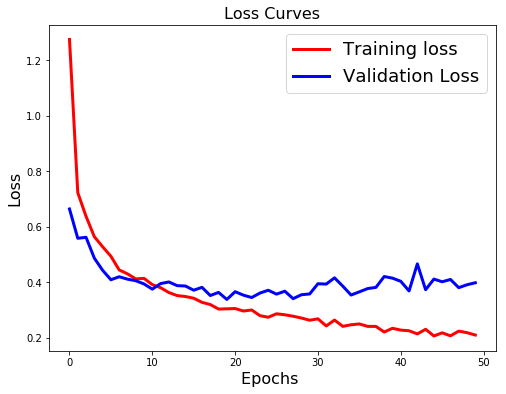

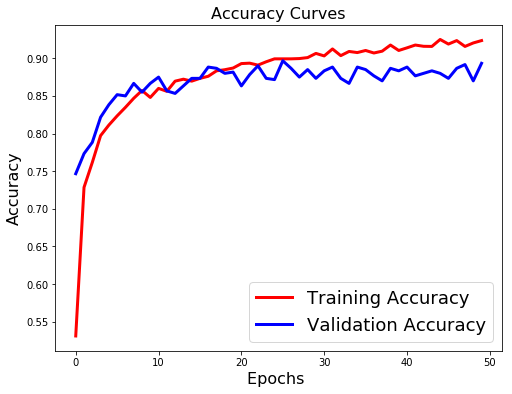

In [3]:
# Import all required modules
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

#from keras import backend as K
#from keras import optimizers
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization,Activation,InputLayer
from keras.utils import np_utils
#from keras.callbacks import EarlyStopping
# keras settings
#{
#    "image_data_format": "channels_last",
#    "epsilon": 1e-07,
#    "backend": "tensorflow",
#    "floatx": "float32"
#}
# Early stopping is not used
#EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)

# Parameters
kernel_size=3
conv_kernels_1=32
conv_kernels_2=64
drop_prop_1=0.25
drop_prop_2=0.5

pool_size=2
dense_size=512

batch_size=32
epochs=50

# Prepare data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Use less data to save computing time for prototype
data_percent=10
X_train = X_train[:X_train.shape[0]//data_percent]
y_train = y_train[:y_train.shape[0]//data_percent]
X_test = X_test[:X_test.shape[0]//data_percent]
y_test = y_test[:y_test.shape[0]//data_percent]

n_train, height, width = X_train.shape
depth = 1 # grayscale images
n_test = X_test.shape[0]
n_classes = np.unique(y_train).shape[0]
input_shape=(height,width,depth)

# Normalize data to [0, 1] range
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train)
X_test /= np.max(X_test)
X_train = X_train.reshape(n_train,height,width,depth)
X_test = X_test.reshape(n_test,height,width,depth)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

def create_cnn_model(): 
	cnn = Sequential()
	
	# Add input layer
	cnn.add(InputLayer(input_shape=input_shape))
	
	# Normalization
	cnn.add(BatchNormalization())
	
	# Conv + Maxpooling
	cnn.add(Conv2D(conv_kernels_1, (kernel_size, kernel_size), padding="same",activation="relu"))
	cnn.add(MaxPooling2D((pool_size,pool_size)))
	# Dropout
	cnn.add(Dropout(drop_prop_1))
	
	cnn.add(Conv2D(conv_kernels_2, (kernel_size, kernel_size)))
	cnn.add(MaxPooling2D((pool_size,pool_size)))
	
	# Dropout
	cnn.add(Dropout(drop_prop_2))
	
	cnn.add(Conv2D(conv_kernels_2, (kernel_size, kernel_size)))
	cnn.add(MaxPooling2D((pool_size,pool_size)))
	
	# Cannot add more layers as the size is less than kernel_size
	#cnn.add(Conv2D(conv_kernels_2, (kernel_size, kernel_size)))
	#cnn.add(MaxPooling2D((pool_size,pool_size)))
	
	cnn.add(Flatten())
	cnn.add(Dense(dense_size, activation='relu'))
	cnn.add(Dropout(drop_prop_2))
	cnn.add(Dense(dense_size//2, activation='relu'))
	cnn.add(Dropout(drop_prop_2))
	cnn.add(Dense(n_classes, activation='softmax'))
	cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer="Adam")
	return cnn

# Create a model
model=create_cnn_model()
# Print the model summary
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.10, batch_size=batch_size, epochs=epochs, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print ('test_loss:%2.2f,test_accuracy:%2.2f' % (test_loss,test_accuracy))
#Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)